# 1. Data Understanding

Pada bagian ini, kita akan melakukan eksplorasi data untuk memahami struktur dan informasi yang terkandung dalam dataset **Bank Customer Churn Dataset**. Dataset ini berisi data pelanggan yang digunakan untuk memprediksi apakah seorang pelanggan akan churn atau keluar bank.

## Informasi Dataset
Dataset ini memiliki 10000 sampel data, masing-masing dengan 11 fitur (kolom) yang menggambarkan informasi customer, serta satu kolom target yang menunjukkan apakah pelanggan tersebut churn (1) atau tidak (0).

Fitur-fitur yang terdapat dalam dataset ini adalah:
1. **customer_id**: Nilai acak yang mengidentifikasi pelanggan; tidak memengaruhi keputusan pelanggan untuk keluar dari bank.
2. **credit_score**: Skor kredit pelanggan; pelanggan dengan skor kredit lebih tinggi cenderung lebih stabil dan tidak keluar dari bank.
3. **country**: Lokasi geografis pelanggan; lokasi dapat memengaruhi perilaku dan keputusan pelanggan untuk keluar dari bank.
4. **gender**: Jenis kelamin pelanggan; menarik untuk dianalisis apakah jenis kelamin memiliki pengaruh terhadap keputusan pelanggan.
5. **age**: Umur pelanggan dalam tahun; pelanggan yang lebih tua biasanya lebih setia dan kecil kemungkinan keluar dari bank.
6. **tenure**: Jumlah tahun pelanggan telah menjadi nasabah; pelanggan lama biasanya lebih loyal dan tidak mudah keluar.
7. **balance**: Saldo rekening pelanggan; pelanggan dengan saldo tinggi cenderung tetap menjadi nasabah.
8. **products_number**: Jumlah produk yang dimiliki pelanggan di bank; pelanggan yang menggunakan lebih banyak produk cenderung bertahan.
9. **credit_card**: Menunjukkan apakah pelanggan memiliki kartu kredit; biasanya pelanggan dengan kartu kredit lebih terikat pada bank.
10. **active_member**: Menunjukkan apakah pelanggan aktif; pelanggan aktif cenderung tidak keluar dari bank.
11. **estimated_salary**: Perkiraan gaji pelanggan; pelanggan dengan gaji lebih rendah cenderung lebih berisiko untuk keluar dari bank.
12. **churn**: Target variabel, menunjukkan apakah pelanggan telah keluar dari bank (1) atau masih bertahan (0).

## Tujuan Eksplorasi
Eksplorasi data ini bertujuan untuk:
1. Mengetahui apakah ada nilai yang hilang (missing values) dalam dataset.
2. Mengetahui apakah ada data duplikat dalam dataset.
3. Memahami distribusi fitur-fitur numerik.
4. Mengecek apakah ada nilai outlier dalam dataset

Sekarang, kita akan mulai dengan melihat sekilas struktur dataset dan statistik deskriptif untuk mendapatkan pemahaman dasar.

In [1]:
from google.colab import files

import os, shutil
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Import Library

Pada cell ini, dilakukan proses import berbagai library yang dibutuhkan untuk menjalankan proyek machine learning:

- **pandas**: Untuk memproses dan memanipulasi data dalam bentuk DataFrame.
- **matplotlib.pyplot** & **seaborn**: Untuk membuat visualisasi data (grafik, histogram, heatmap, dll).
- **numpy**: Digunakan untuk operasi numerik dan array multidimensi.
- **google.colab.files**: Digunakan untuk mengunggah atau mengunduh file dari Google Colab ke komputer lokal dan sebaliknya.
- **os**: Library bawaan Python untuk berinteraksi dengan sistem operasi, seperti membuat folder, membaca isi direktori, atau menghapus file.
- **shutil**: Digunakan untuk operasi file tingkat tinggi, seperti menyalin, memindahkan, atau menghapus direktori dan file secara rekursif.
- **zipfile**: Untuk mengekstrak file ZIP—berguna saat mengimpor dataset yang dikompresi dalam format .zip.
- **train_test_split**: Membagi dataset menjadi data latih dan data uji.
- **StandardScaler**: Melakukan normalisasi/standardisasi fitur numerik.
- **OneHotEncoding**: Melakukan encoding pada fitur kategorikal yang tidak memiliki nilai ordinal.
- **resample**: Melakukan downsampling.
- **LogisticRegression, RandomForestClassifier, SVC**: Algoritma machine learning yang digunakan untuk klasifikasi.
- **accuracy_score, precision_score, recall_score, f1_score, confusion_matrix**: Berbagai metrik evaluasi performa model klasifikasi.

In [2]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"satyaviraprathama","key":"ac814856cc9c7ad2092d93c6b1f4735d"}'}

In [3]:
# Download kaggle dataset and unzip the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gauravtopre/bank-customer-churn-dataset
!unzip bank-customer-churn-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
License(s): other
bank-customer-churn-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bank-customer-churn-dataset.zip
replace Bank Customer Churn Prediction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Bank Customer Churn Prediction.csv  


Data Loading -> proses mengimpor dan menyimpan data dari berbagai sumber ke dalam sistem atau database tertentu.
Pada tahap ini, kita mengambil data dari kaggle

Baris kode `from google.colab import files` digunakan dalam mengimpor modul dari Google Colab. Ini memungkinkan pengguna untuk mengunggah file dari komputer lokal ke sesi notebook di Google Colab. Selanjutnya, `files.upload()` adalah perintah yang mengizinkan pengguna untuk mengunggah file.

Pada tahap ini, Anda diminta untuk mengunggah token dari akun Kaggle.
Tahap selanjutnya adalah menggunakan perintah !kaggle datasets download untuk mengunduh dataset dengan nama -d gauravtopre/bank-customer-churn-dataset dari Kaggle. Dataset ini disebut "bank-customer-churn-dataset" dan dikaitkan dengan pengguna "gauravtopre".
Lalu, gunakan perintah !unzip untuk mengekstrak file zip yang baru saja diunduh dengan nama "bank-customer-churn-dataset.zip". Proses ini akan mengekstrak file tersebut dalam folder yang sama tempat notebook Colab berada.

In [4]:
# Load the dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')

# Tampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Dataset Info

Pada tahap ini, kita mengecek informasi dasar mengenai dataset. Dataset ini terdiri dari 10000 entri dan 11 kolom. Semua kolom tidak mengandung nilai yang hilang. Tipe data untuk mayoritas kolom adalah integer, kecuali kolom **country** dan **gender**, yang memiliki tipe data object dan kolom **balance** dan **estimated_salary**, yang memiliki tipe data float.

Kolom-kolom dataset ini terdiri dari:
1. **customer_id**
2. **credit_score**
3. **country**
4. **gender**
5. **age**
6. **tenure**
7. **balance**
8. **products_number**
9. **credit_card**
10. **active_member**
11. **estimated_salary**
12. **churn**

In [5]:
# Tampilkan beberapa baris pertama untuk melihat struktur data
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Tampilan Data

Di atas adalah 5 baris pertama dari dataset. Dari data yang ditampilkan, kita dapat melihat variabel numerik dan kategorikal yang menggambarkan informasi pelanggan seperti nilai kredit, usia, banyak produk dan faktor lainnya yang digunakan untuk memprediksi churn.

Salah satu contoh data yang ditampilkan adalah:
- Pasien 1 memiliki nilai kredit 619, usia 42, dan terdapat 1 produk, serta churn.

In [6]:
# Statistik deskriptif untuk fitur numerik
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Statistik Deskriptif

Tabel statistik deskriptif memberikan gambaran mengenai distribusi fitur numerik dalam dataset. Beberapa informasi yang menarik dari statistik deskriptif ini adalah:

|Fitur|Penjelasan|
| --------------------- | --------------------------|
| **customer\_id**| ID unik tiap pelanggan. Nilai ini hanya digunakan untuk identifikasi, bukan untuk analisis. Nilainya mulai dari sekitar **15.56 juta** hingga **15.81 juta**.|
| **credit\_score**| Skor kredit pelanggan, berkisar antara **350 (terendah)** hingga **850 (tertinggi)**, dengan rata-rata **650.5**.
| **age**| Usia pelanggan, mulai dari **18 tahun** hingga **92 tahun**, rata-rata **38.9 tahun**. Usia ini cukup tersebar.|
| **tenure**| Lama pelanggan menjadi nasabah, dari **0 hingga 10 tahun**, dengan rata-rata **5 tahun**.|
| **balance**| Saldo nasabah, sangat bervariasi dari **0 hingga 250.898**. Terdapat **25% pelanggan memiliki saldo nol**, artinya banyak pelanggan tidak aktif secara finansial.|
| **products\_number**| Jumlah produk yang digunakan oleh pelanggan, antara **1 dan 4**, rata-rata sekitar **1.53 produk**. Sebagian besar pelanggan hanya menggunakan 1 produk.|
| **credit\_card**| Apakah pelanggan memiliki kartu kredit. Rata-rata **70.5%** pelanggan memiliki kartu kredit.|
| **active\_member**| Apakah pelanggan aktif. Sekitar **51.5%** pelanggan tergolong aktif.|
| **estimated\_salary** | Estimasi gaji pelanggan, sangat bervariasi dari **11.58** hingga **199.992**, rata-rata **100.090**. Perlu dicatat bahwa distribusi cukup lebar (std: 57.510).|
| **churn**| Target variabel. Sekitar **20.4%** pelanggan dalam dataset ini keluar dari bank. Artinya, dataset ini **sedikit tidak seimbang** terhadap kelas negatif (tidak churn). |


Beberapa fitur perlu dinormalisasi agar tidak menimbulkan bias.

In [7]:
# Mengecek missing values
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


Cek Missing Values

Hasil pengecekan missing values menunjukkan bahwa tidak ada nilai yang hilang pada dataset ini. Semua kolom memiliki 10000 entri non-null, yang berarti kita tidak perlu melakukan penanganan terhadap missing values pada tahap ini.

In [8]:
# Menampilkan jumlah data duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

# Menampilkan baris-baris duplikat
duplikat = df[df.duplicated()]
print("Baris duplikat:")
print(duplikat)

Jumlah baris duplikat: 0
Baris duplikat:
Empty DataFrame
Columns: [customer_id, credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn]
Index: []


Cek Duplicate Values

Dapat dilihat bahwa dataset yang dipakai pada proyek saat ini tidak mengandung data duplikat. Sehingga tahapan proyek dapat dilanjutkan ke tahap pengecekan distribusi data dan pengecekan nilai outlier

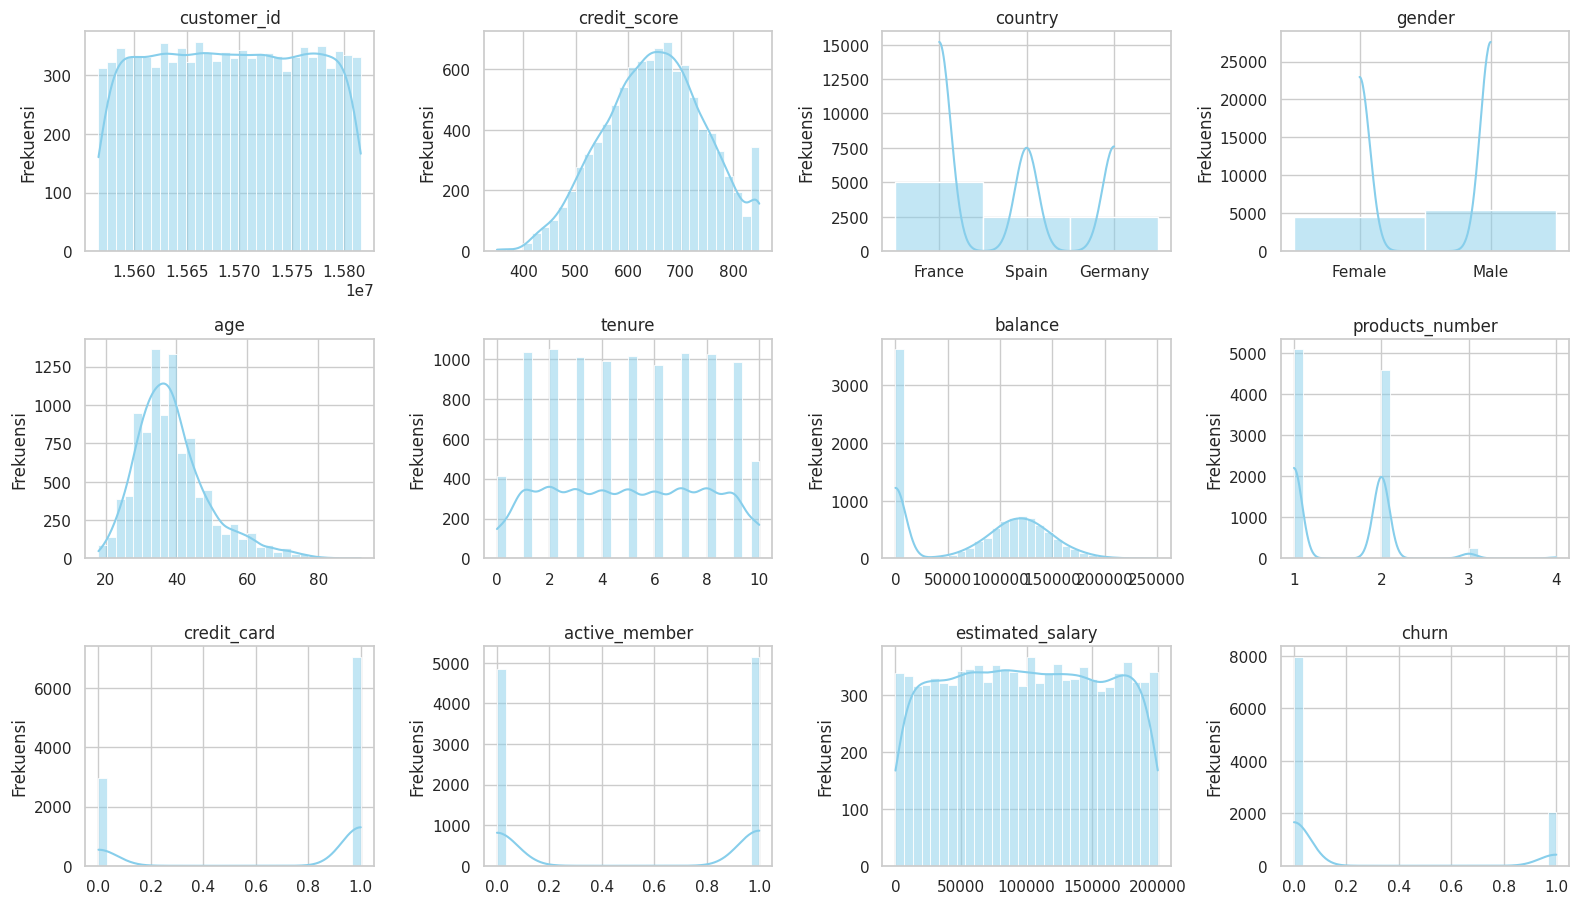

In [9]:
# Set style visualisasi
sns.set(style="whitegrid")

# Visualisasi distribusi setiap fitur numerik sebelum normalisasi
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Distribusi Setiap Fitur (Histogram + KDE)
1. customer_id
- Merata dan unik; tidak memberikan informasi prediktif karena hanya penanda identitas.

2. credit_score
- Distribusi mendekati normal dengan puncak sekitar 650-700. Sedikit ekor ke kiri (pelanggan dengan skor rendah).

3. country
- Mayoritas pelanggan berasal dari France, diikuti Germany dan Spain.

4. gender
- Distribusi hampir seimbang antara Male dan Female, sedikit lebih banyak pria.

5. age
- Distribusi condong ke kanan, mayoritas pelanggan berusia 30-40 tahun. Ada juga pelanggan lansia (>60), meskipun lebih sedikit.

6. tenure
- Distribusi merata dari 0 hingga 10 tahun. Tidak ada pola dominan.

7. balance
- Banyak pelanggan dengan saldo nol. Sisanya tersebar hingga sekitar 250.000.

8. products_number
- Mayoritas pelanggan memiliki 1 atau 2 produk bank. Sangat sedikit yang memiliki lebih dari 2 produk.

9. credit_card
- Lebih banyak pelanggan yang memiliki kartu kredit.

10. active_member
- Jumlah pelanggan aktif dan tidak aktif relatif seimbang, sedikit lebih banyak yang aktif.

11. estimated_salary
- Distribusi hampir rata, tidak ada pola khusus.

12. churn (target)
- Mayoritas pelanggan tidak churn. Ini menandakan adanya class imbalance.

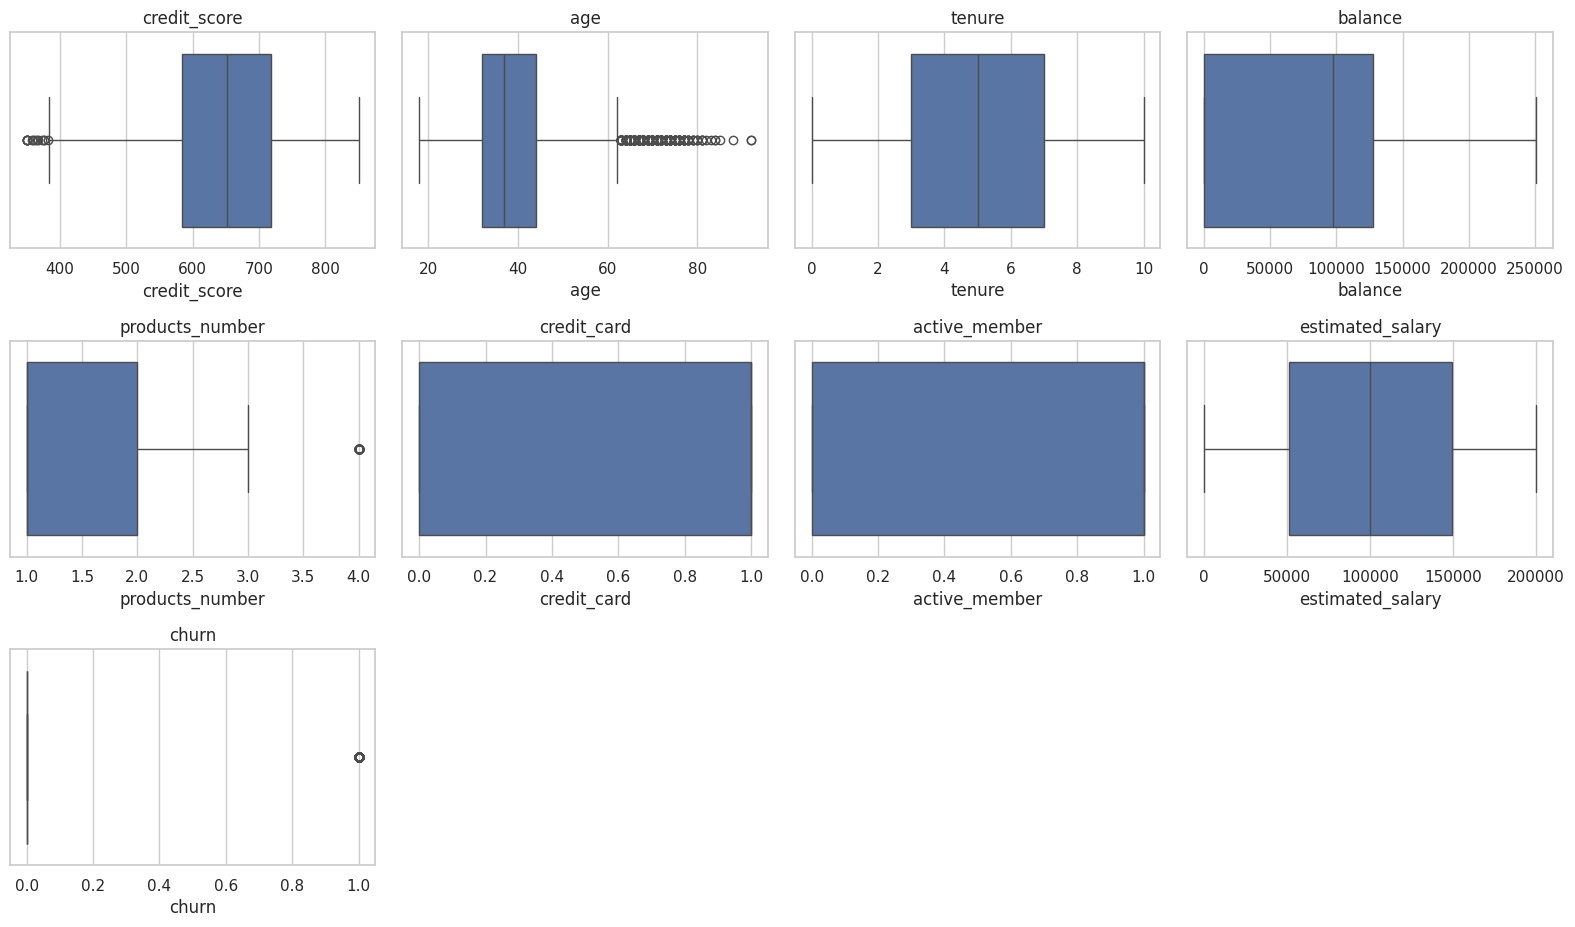

In [10]:
# Boxplot untuk melihat outlier
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['customer_id'])
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

Boxplot Fitur Sebelum Normalisasi
- Outlier signifikan: credit_score, age, dan products_number. Akan tetapi tetap dipertahankan dikarenakan dapat mepresentasikan data pelanggan yang valid dan signifikan.

- Fitur yang merata: tenure, estimated_salary.

- Class imbalance pada target (churn).

- Nilai biner (credit_card, active_member) tidak memberikan informasi distribusi dalam boxplot.

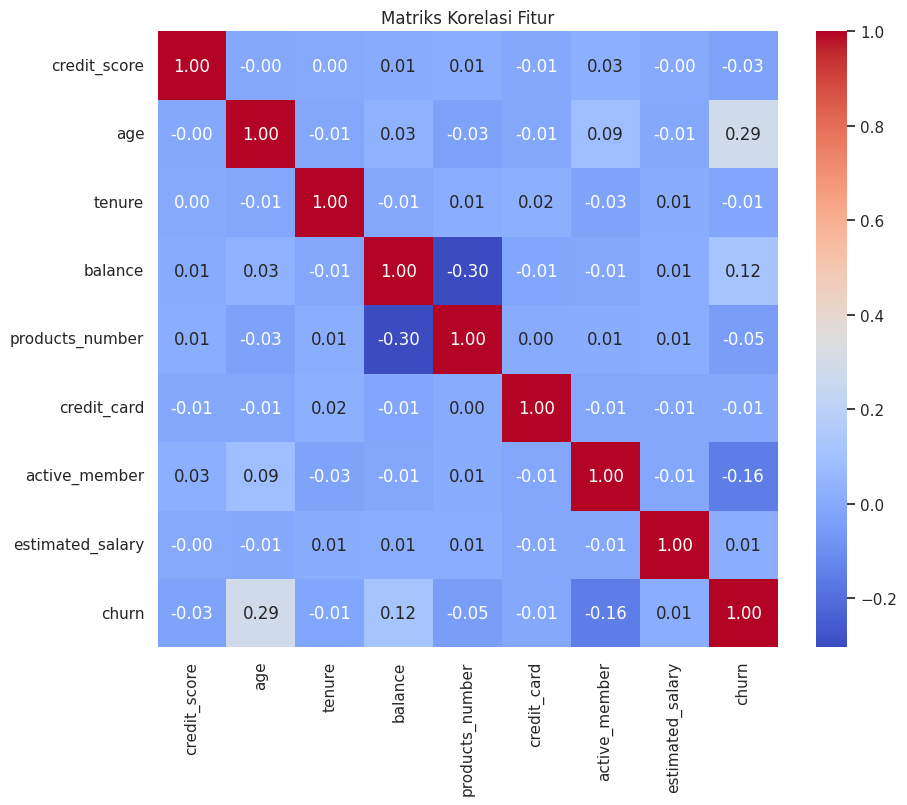

In [11]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Fitur")
plt.show()

Matriks Korelasi
- Fitur **age** memiliki korelasi paling tinggi terhadap target `churn` (**0.29**), menunjukkan bahwa semakin tua pelanggan, semakin cenderung churn.
- **active_member** dan **balance** juga memiliki korelasi sedang terhadap `churn` menunjukkan bahwa anggota aktif cenderung tidak churn dan saldo lebih tinggi sedikit lebih cenderung churn.
- Sebagian besar fitur lainnya menunjukkan korelasi rendah satu sama lain, mengindikasikan rendahnya multikolinearitas.


# 2. Data Preparation

Tahap ini bertujuan untuk menyiapkan data sebelum digunakan dalam proses pelatihan model machine learning. Berdasarkan hasil eksplorasi awal (EDA) di tahap Data Understanding, terdapat beberapa hal yang perlu diperhatikan dalam proses ini, seperti imbalance class pada target (churn), distribusi fitur yang tidak seragam, dan perbedaan skala antar fitur pada tahap Data Understanding. Oleh karena itu tahap ini akan dilanjutkan dengan proses downsampling, encoding, splitting data, normalisasi.

In [12]:
majority = df[df['churn'] == 0]
minority = df[df['churn'] == 1]

# Downsample kelas mayoritas
majority_downsampled = resample(majority,
                                replace=False,     # tanpa penggandaan
                                n_samples=len(minority),  # samakan jumlahnya
                                random_state=42)

# Gabungkan kembali dengan kelas minoritas
df_downsampled = pd.concat([majority_downsampled, minority])

In [13]:
df_downsampled.shape

(4074, 12)

Downsampling -> menangani ketidakseimbangan kelas dalam data.
Langkah-langkah yang dilakukan:
1. Pisahkan data berdasarkan kelas churn.

2. majority berisi data pelanggan yang tidak churn (churn == 0)

3. minority berisi data pelanggan yang churn (churn == 1)

4. Lakukan downsampling pada kelas mayoritas. Kita kurangi jumlah data mayoritas hingga sama banyak dengan data minoritas. Gunakan fungsi resample dari sklearn.utils untuk melakukan ini.

5. Gabungkan kembali kedua subset (mayoritas yang sudah di-downsample dan minoritas).

Ini menghasilkan dataset yang seimbang dan siap digunakan untuk pelatihan model.

In [14]:
# Hitung nilai unik pada kolom kategorikal
categorical_features = df_downsampled.select_dtypes(include=['object']).columns
print("Nilai Unik pada Kolom Kategorikal:")
for column in categorical_features:
  unique_counts = df_downsampled[column].value_counts()
  # Tampilkan nilai unik dari setiap koloom
  print(f"{column}: {unique_counts}")

Nilai Unik pada Kolom Kategorikal:
country: country
France     1901
Germany    1245
Spain       928
Name: count, dtype: int64
gender: gender
Male      2084
Female    1990
Name: count, dtype: int64


In [15]:
df_encoded = df_downsampled.copy()

oneHotEncoder = OneHotEncoder(sparse_output=False)

# Transformasi kolom kategorikal yang tidak memiliki nilai ordinal
encoded_data = oneHotEncoder.fit_transform(df_encoded[['country', 'gender']])

# Mendapatkan nama kolom setelah transformasi
onehot_cols = oneHotEncoder.get_feature_names_out(['country', 'gender'])

# Membuat dataframe dari hasil one hot encoding
encoded_df = pd.DataFrame(encoded_data, columns=onehot_cols, index=df_encoded.index)

# Gabungkan dataframe original dengan dataframe hasil one hot encoding
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Buang kolom kategorikal yang sudah ditransformasi dengan one hot encoding
df_encoded.drop(['country', 'gender'], axis=1, inplace=True)

In [16]:
df_encoded.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
8165,15813503,606,37,8,154712.58,2,1,0,89099.18,0,0.0,0.0,1.0,0.0,1.0
6409,15690695,683,33,9,0.00,2,1,1,38784.42,0,1.0,0.0,0.0,1.0,0.0
2157,15750649,744,44,3,0.00,2,1,1,189016.14,0,1.0,0.0,0.0,1.0,0.0
1618,15662955,697,27,8,141223.68,2,1,0,90591.15,0,1.0,0.0,0.0,0.0,1.0
1633,15755868,562,35,7,0.00,1,0,0,48869.67,0,1.0,0.0,0.0,0.0,1.0


In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4074 entries, 8165 to 9998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       4074 non-null   int64  
 1   credit_score      4074 non-null   int64  
 2   age               4074 non-null   int64  
 3   tenure            4074 non-null   int64  
 4   balance           4074 non-null   float64
 5   products_number   4074 non-null   int64  
 6   credit_card       4074 non-null   int64  
 7   active_member     4074 non-null   int64  
 8   estimated_salary  4074 non-null   float64
 9   churn             4074 non-null   int64  
 10  country_France    4074 non-null   float64
 11  country_Germany   4074 non-null   float64
 12  country_Spain     4074 non-null   float64
 13  gender_Female     4074 non-null   float64
 14  gender_Male       4074 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 509.2 KB


Encoding Data Kategorikal -> data kategorikal diubah menjadi bentuk numerik agar dapat dipahami oleh model.

Setelah melakukan penyeimbangan kelas, tahap selanjutnya adalah melakukan encoding terhadap fitur kategorikal yang tidak memiliki urutan (non-ordinal). Algoritma machine learning tidak dapat memproses data dalam bentuk teks secara langsung, sehingga kita perlu mengubahnya menjadi bentuk numerik.
Langkah-Langkah:

1. Salin DataFrame yang sudah seimbang (df\_downsampled). Digunakan untuk memastikan data asli tetap utuh.

2. Inisialisasi `OneHotEncoder` dari `sklearn.preprocessing`. Parameter `sparse_output=False` digunakan agar hasil transformasi berupa array biasa, bukan format sparse matrix.

3. Transformasi kolom `country` dan `gender`. Kedua kolom ini berisi data kategorikal non-ordinal (tidak memiliki urutan nilai), sehingga cocok untuk One-Hot Encoding.

4. Ambil nama-nama kolom baru hasil transformasi. `get_feature_names_out()` mengembalikan nama-nama fitur seperti `country_France`, `gender_Female`, dll.

5. Buat DataFrame baru dari hasil encoding. Gunakan indeks yang sama dengan `df_encoded` agar bisa digabungkan kembali secara aman.

6. Gabungkan hasil One-Hot Encoding dengan data asli. Digabungkan secara kolom (`axis=1`).

7. Hapus kolom asli `country` dan `gender`. Karena nilainya sudah direpresentasikan dalam bentuk numerik.

In [18]:
# Pemisahan Data menjadi Training dan Test Set
X = df_encoded.drop(columns=['churn', 'customer_id'])  # Fitur
y = df_encoded['churn']  # Target

Pemisahan Fitur dan Target

Memisahkan variabel fitur (`X`) dan target (`y`) dari DataFrame yang sudah dinormalisasi untuk persiapan training dan evaluasi model.

In [19]:
# Membagi data menjadi 80% training dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset dibagi menjadi 80% data latih dan 20% data uji. Data latih digunakan untuk membangun model, sementara data uji digunakan untuk mengevaluasi kinerja model. Pembagian ini memastikan bahwa model dapat diuji dengan data yang tidak pernah dilihat sebelumnya, memberikan gambaran yang lebih akurat tentang kemampuan generalisasi model.

In [20]:
# Menampilkan ukuran data latih dan data uji
print(f"Ukuran data latih: {X_train.shape[0]} | Ukuran data uji: {X_test.shape[0]}")

Ukuran data latih: 3259 | Ukuran data uji: 815


Menampilkan Ukuran Data Latih dan Uji

Menampilkan jumlah sampel pada data latih dan data uji untuk memastikan pemisahan dataset berjalan sesuai proporsi.

In [21]:
# Kolom fitur yang perlu dinormalisasi (kecuali kolom target 'churn' dan kolom fitur biner)
features = df_encoded[numerical_features.columns.tolist()].drop(columns=['churn', 'credit_card', 'active_member'])

Seleksi Fitur

Memisahkan kolom numerikal fitur dari target (`churn`) dan kolom fitur biner (`credit_card`, `active_member`) agar dapat dilakukan proses normalisasi hanya pada fitur input yang perlu dinormalisasi.

In [22]:
# Normalisasi Data
scaler = StandardScaler()

In [23]:
scaler = StandardScaler()
scaler.fit(X_train[features.columns])
X_train[features.columns] = scaler.transform(X_train.loc[:, features.columns])
X_train[features.columns].head()

,credit_score,age,tenure,balance,products_number,estimated_salary
1996,-1.181612,1.923367,-1.031368,-1.354826,0.723886,-1.008172
2720,0.778754,1.363610,1.048600,0.666529,2.194675,0.508045
4224,1.197374,0.523974,-1.031368,-1.354826,-0.746903,-0.914473
6132,0.380555,-0.688833,1.395261,0.705336,-0.746903,1.702542
9344,0.788964,-1.248590,-1.031368,0.467643,-0.746903,0.010223


In [24]:
X_test[features.columns] = scaler.transform(X_test.loc[:, features.columns])
X_test[features.columns].head()

,credit_score,age,tenure,balance,products_number,estimated_salary
3382,0.053827,2.856296,0.008616,0.912470,0.723886,-0.016046
81,1.299476,-0.875419,-1.031368,-1.354826,-0.746903,0.618170
511,-0.181009,-0.315661,0.355277,0.066561,0.723886,-0.047802
9578,0.125299,-0.688833,-1.031368,0.578209,0.723886,-0.793670
3105,0.288663,-1.248590,-0.338045,-1.354826,0.723886,0.756425


Normalisasi Fitur

Melakukan standardisasi fitur numerik menggunakan `StandardScaler` agar semua fitur berada dalam skala yang sama (mean = 0, std = 1).

Setelah normalisasi menggunakan **StandardScaler**, semua fitur numerik dalam dataset, seperti **credit_score**, **age**, dan **tenure**, kini berada dalam rentang yang lebih seragam dengan nilai rata-rata 0 koma sekian dan standar deviasi 1. Proses ini memastikan bahwa fitur yang sebelumnya memiliki skala yang sangat bervariasi kini berada pada skala yang konsisten, sehingga model machine learning dapat memproses data dengan lebih efisien tanpa terpengaruh oleh perbedaan skala antar fitur. Ini penting agar model machine learning dapat mengolah data dengan lebih baik, terutama untuk algoritma yang sensitif terhadap skala fitur, seperti **Logistic Regression**. Kolom target **churn** tetap berada pada nilai asli (0 atau 1), karena ini adalah variabel biner. Sama dengan dua fitur lain yaitu **credit_card** dan **active_member**.

# 3. Modeling

Pada tahap ini, kita akan membangun dan membandingkan beberapa model machine learning untuk menyelesaikan masalah klasifikasi, yaitu memprediksi apakah seorang pelanggan akan churn berdasarkan fitur-fitur input dalam dataset.

### Pemilihan Model
Untuk memberikan hasil yang optimal dan memenuhi prinsip _solution statement_, kita akan membandingkan performa dari dua algoritma klasifikasi yang umum digunakan dan efektif dalam domain bank churn prediction:

- **Logistic Regression**: Algoritma dasar yang sederhana dan mudah diinterpretasikan.
- **Random Forest**: Algoritma ensemble yang kuat terhadap overfitting dan cocok untuk data tabular.

Pemilihan lebih dari satu model ini bertujuan untuk menentukan pendekatan terbaik dalam mendeteksi churn.

### Training Model
Setiap model akan dilatih menggunakan data latih (`X_train` dan `y_train`) yang telah diproses pada tahap sebelumnya. Pelatihan ini dilakukan secara terpisah untuk memastikan setiap model diberi kesempatan yang adil dalam mempelajari pola dari data.

### Evaluasi Model
Setelah pelatihan, model akan diuji menggunakan data uji (`X_test`) dan dievaluasi menggunakan metrik sebagai berikut:

- **Accuracy**: Persentase prediksi yang benar terhadap seluruh data uji.
- **Precision**: Kemampuan model dalam mengklasifikasikan kasus positif (churn) dengan benar.
- **Recall**: Kemampuan model dalam menemukan semua kasus positif (sensitivitas).
- **F1-Score**: Harmonic mean dari precision dan recall, cocok untuk data yang imbalanced.

Hasil evaluasi dari kedua model akan dibandingkan dalam bentuk tabel dan grafik untuk memudahkan pemilihan model terbaik.

In [25]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

Inisialisasi Model

Membuat dua model klasifikasi yang akan digunakan: Logistic Regression, Random Forest, masing-masing dengan parameter dasar dan `random_state=42` untuk reproduktibilitas.

In [26]:
# Dictionary untuk menyimpan hasil evaluasi
results = {}
conf_matrices = {}

Inisialisasi Tempat Penyimpanan Hasil

Membuat dictionary `results` untuk menyimpan metrik evaluasi, dan `conf_matrices` untuk menyimpan confusion matrix dari setiap model.

In [27]:
# Melatih dan evaluasi semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1]
    conf_matrices[name] = cm

Pelatihan dan Evaluasi Model

Melatih setiap model pada data latih, lalu melakukan prediksi pada data uji.  
Setelah itu, dihitung metrik evaluasi (accuracy, precision, recall, dan F1-score) serta confusion matrix untuk setiap model, dan disimpan ke dalam dictionary.

In [28]:
# Menampilkan metrik evaluasi dalam tabel
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
print("Evaluasi Metrik Setiap Model:")
display(metrics_df.T)

Evaluasi Metrik Setiap Model:


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.721472,0.688312,0.712366,0.700132
Random Forest,0.743558,0.729577,0.696237,0.712517


Menampilkan Tabel Evaluasi

Mengubah hasil evaluasi dari semua model menjadi DataFrame, lalu menampilkannya dalam bentuk tabel agar mudah dibandingkan.

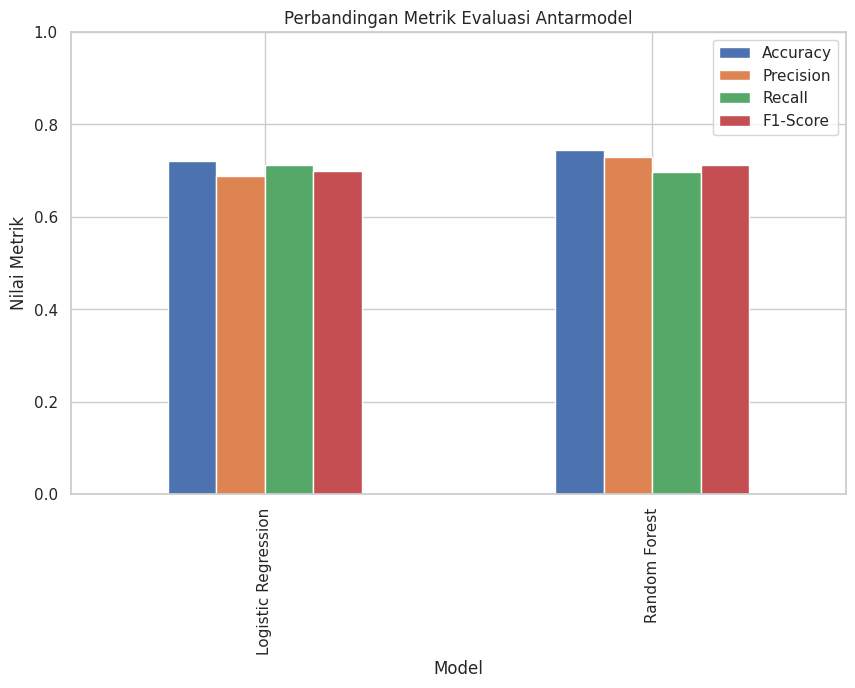

In [29]:
# Visualisasi perbandingan metrik
metrics_df.T.plot(kind='bar', figsize=(10, 6))
plt.title("Perbandingan Metrik Evaluasi Antarmodel")
plt.xlabel("Model")
plt.ylabel("Nilai Metrik")
plt.ylim(0, 1)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

Visualisasi Perbandingan Metrik

Menampilkan grafik batang untuk membandingkan nilai metrik evaluasi (Accuracy, Precision, Recall, F1-Score) dari setiap model secara visual.

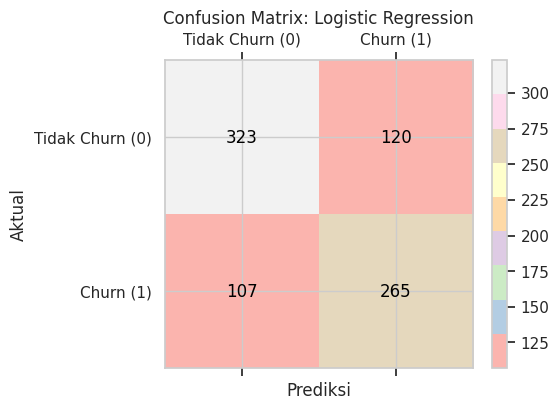

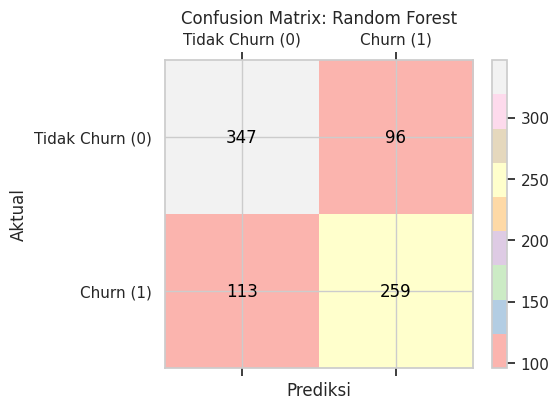

In [30]:
# Visualisasi confusion matrix untuk tiap model
for name, cm in conf_matrices.items():
    fig, ax = plt.subplots(figsize=(5, 4))
    cax = ax.matshow(cm, cmap='Pastel1')
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.xticks([0, 1], ['Tidak Churn (0)', 'Churn (1)'])
    plt.yticks([0, 1], ['Tidak Churn (0)', 'Churn (1)'])
    plt.colorbar(cax)
    plt.show()

Visualisasi Confusion Matrix

Menampilkan confusion matrix untuk masing-masing model untuk melihat jumlah prediksi benar dan salah pada masing-masing kelas (positif dan negatif churn).

**Hasil Evaluasi Model**

Setelah melatih kedua model — **Logistic Regression**, **Random Forest** — kami melakukan evaluasi terhadap kinerja masing-masing menggunakan empat metrik utama: Accuracy, Precision, Recall, dan F1-Score. Berikut adalah hasil evaluasi lengkap:

| Model               | Accuracy | Precision | Recall | F1-Score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | 0.721 | 0.688   | 0.712 | 0.7  |
| Random Forest       | 0.743    | 0.729     | 0.696  | 0.712    |

**Interpretasi Hasil**

- **Logistic Regression** menunjukkan performa terburuk di antara kedua model pada tiga metrik evaluasi utama. Model ini mencapai **recall tertinggi sebesar 71.2%**, akan tetapi memiliki **accuracy, precision, dan F1-score** yang lebih rendah dibandingkan Random Forest.
- **Random Forest** menunjukkan performa terbaik di antara kedua model pada tiga metrik evaluasi utama. Model ini mencapai **accuracy sebesar 74.3%, precision sebesar 72.9%, dan F1-score sebesar 71.2%**
- Model ini memiliki **72.9% precision**, yang berarti sekitar 72.9% dari semua kasus yang diprediksi sebagai churn benar-benar positif.
- Dengan **74.3% accuracy**, model berhasil mendeteksi dengan benar sekitar 74.3% dari semua kasus yang diprediksi.
- F1-score sebesar **71.2%** mengindikasikan keseimbangan yang baik antara precision dan recall.

**Confusion Matrix**

Model Logistic Regression menghasilkan confusion matrix sebagai berikut:

- **Benar Negatif (True Negative)**: 323 kasus tidak churn diklasifikasikan dengan benar.
- **Benar Positif (True Positive)**: 265 kasus churn diklasifikasikan dengan benar.
- **False Positive**: 120 kasus tidak churn yang salah diklasifikasikan sebagai churn.
- **False Negative**: 107 kasus churn yang salah diklasifikasikan sebagai tidak churn.

Model Random Forest menghasilkan confusion matrix sebagai berikut:

- **Benar Negatif (True Negative)**: 347 kasus tidak churn diklasifikasikan dengan benar.
- **Benar Positif (True Positive)**: 259 kasus churn diklasifikasikan dengan benar.
- **False Positive**: 96 kasus tidak churn yang salah diklasifikasikan sebagai churn.
- **False Negative**: 113 kasus churn yang salah diklasifikasikan sebagai tidak churn.

# **Kesimpulan**

Berdasarkan hasil evaluasi, **Random Forest dipilih sebagai model terbaik** untuk kasus ini karena memiliki performa paling bagus di tiga dari empat metrik. Meskipun masih ada ruang untuk perbaikan, terutama dalam hal false negative, model ini memberikan dasar yang kuat dan dapat ditingkatkan lebih lanjut dengan teknik tuning di masa depan.